Sorry as I still have a few exams and CA submissions within these two weeks of the project so I do not have time to work on the project in-detailed. The model below is full of crap and I sincerely apologize for this trash of work sorry.

I also did not manage to complete my machine learning model which I plan to use LSTM. (Reasoning: LSTM is a good model for sequential data and it is able to capture historical trend patterns and predict future values.)

Once again, sorry for the crappy work and wasting your time to check this.

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [276]:
df = pd.read_csv("NVDA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376288,271468800
1,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415709,51048000
2,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383456,34320000
3,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382261,24436800
4,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381067,22752000


In [277]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [278]:
df.shape

(6229, 7)

In [279]:
df = df[["Close"]].copy()
df.describe()

,Close
count,6229.000000
mean,39.004635
std,80.772656
min,0.341146
25%,2.710938
50%,4.425000
75%,36.902500
max,493.549988


# Finding p, d, q values for the ARIMA model

Stationarity refers to the time series having consistent (constant) statistical proporties.

We check whether the price series is stationary via the ADF test (Augmented Dickey Fuller).

For ADF test,
H0: The time series is non-stationary.
H1: The time series is stationary.

The p-value obtained from ADF test is 0.9956 which is more than 0.05 (5% significance level) so we reject the null hypothesis and conclude that the time series is stationary.

In [280]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close.dropna())
print("ADF statistics: ", result[0])
print("p-value", result[1])

ADF statistics:  1.1518041997709876
p-value 0.9956353788046679


As the data is stationary, we need to find the order of differencing using the ACF plot.

ndiffs() tells us how many terms are requierd to remove autocorrelation in the series (d, which is the degree of differencing). We found that d=1.

According to the partial autocorrelation plots, we can find that the number of time lags is 5 (p, which is the order of autoregressive model). We observe this by looking at the number of time lags that is above the significance line. [p=5]

In [281]:
from statsmodels.graphics.tsaplots import plot_acf

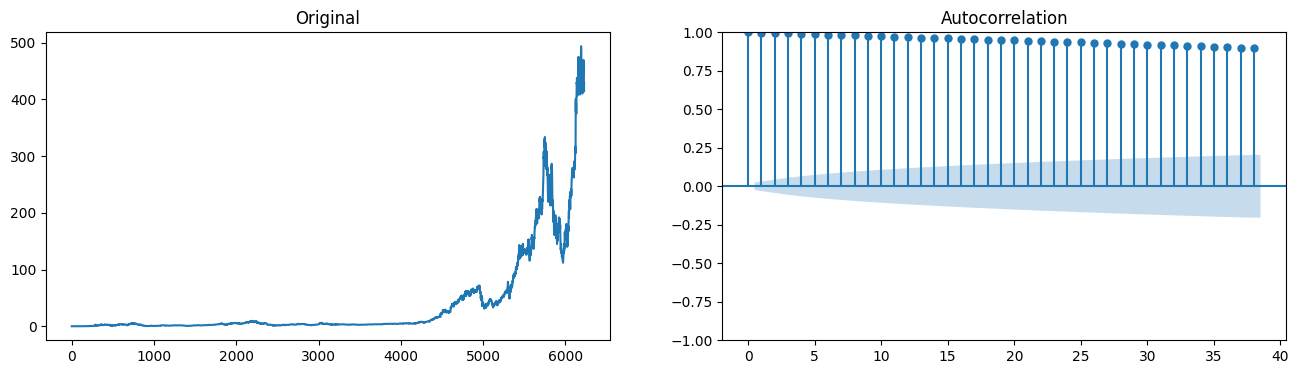

In [282]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close, ax=ax2);

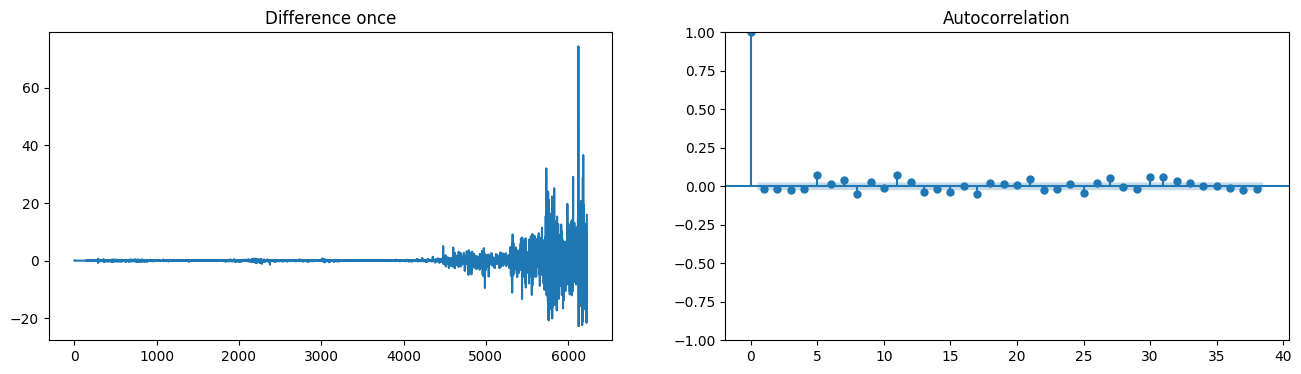

In [283]:
# difference once
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

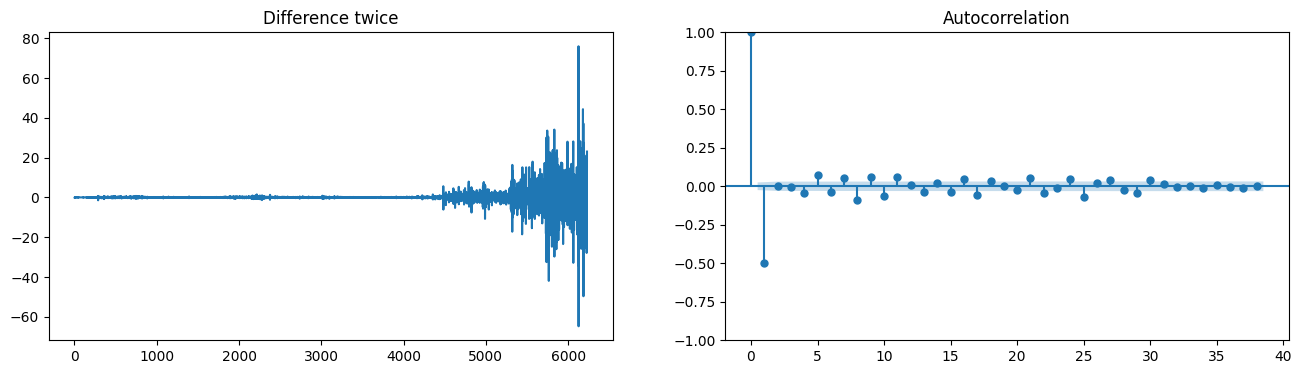

In [284]:
# difference twice
diff = df.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2);

In [285]:
!pip install pmdarima
from pmdarima.arima.utils import ndiffs
ndiffs(df.Close, test="adf")

1

According to the partial autocorrelation plot, we can use 5 for q, which is the order of moving average model. (it is over the significance line and forecast error 5 is suitable to be our q term)

In [286]:
from statsmodels.graphics.tsaplots import plot_pacf

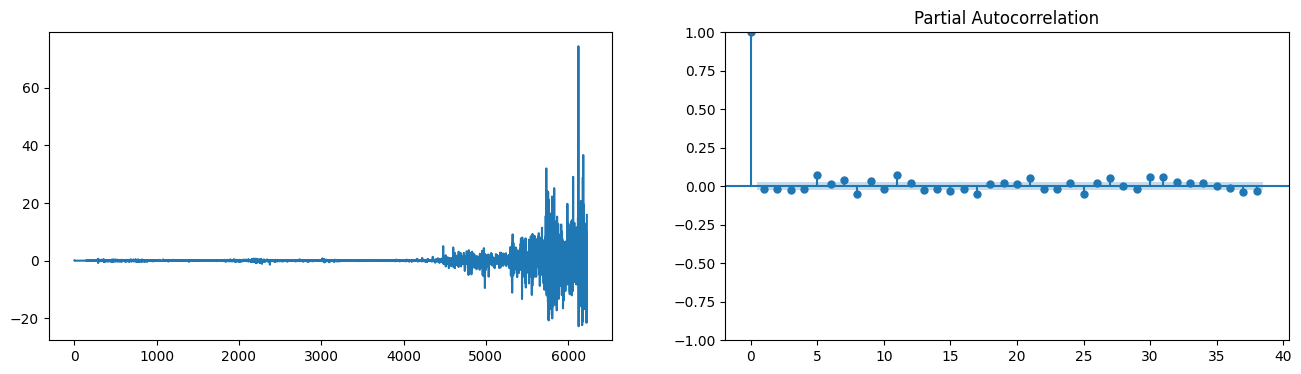

In [287]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax2.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

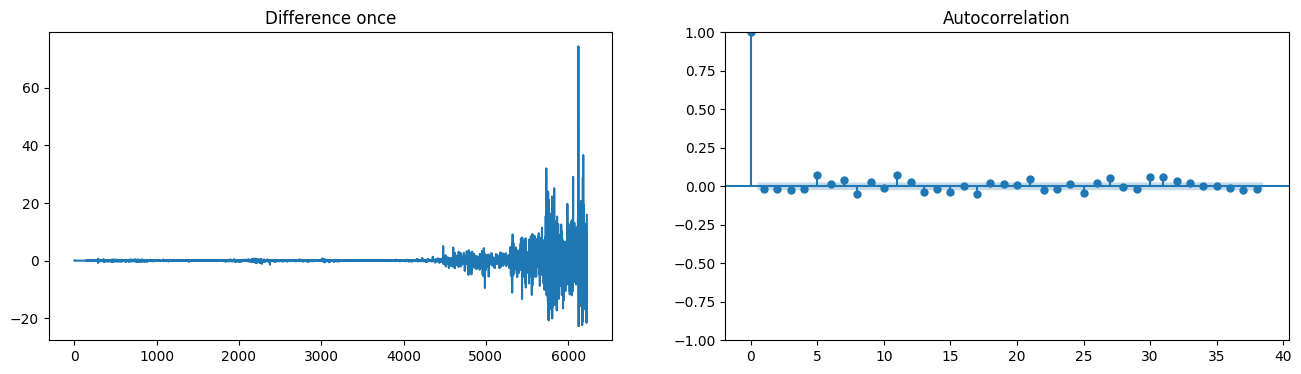

In [288]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

This is just for us to check whether we are using an appropriate value of p, d, q

In [289]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df.Close, order=(5, 1, 5))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [290]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6229
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -15316.937
Date:                Tue, 24 Oct 2023   AIC                          30655.873
Time:                        15:55:50   BIC                          30729.978
Sample:                             0   HQIC                         30681.559
                               - 6229                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1196      0.007    -16.283      0.000      -0.134      -0.105
ar.L2          0.6149      0.007     82.003      0.000       0.600       0.630
ar.L3         -0.6288      0.005   -115.197      0.0

(array([4.31659918e-04, 2.88880099e-03, 9.76713576e-02, 2.04208346e-03,
        2.98841482e-04, 6.64092182e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.66023045e-05]),
 array([-23.48778499, -13.81807848,  -4.14837197,   5.52133455,
         15.19104106,  24.86074758,  34.53045409,  44.20016061,
         53.86986712,  63.53957364,  73.20928015]),
 <BarContainer object of 10 artists>)

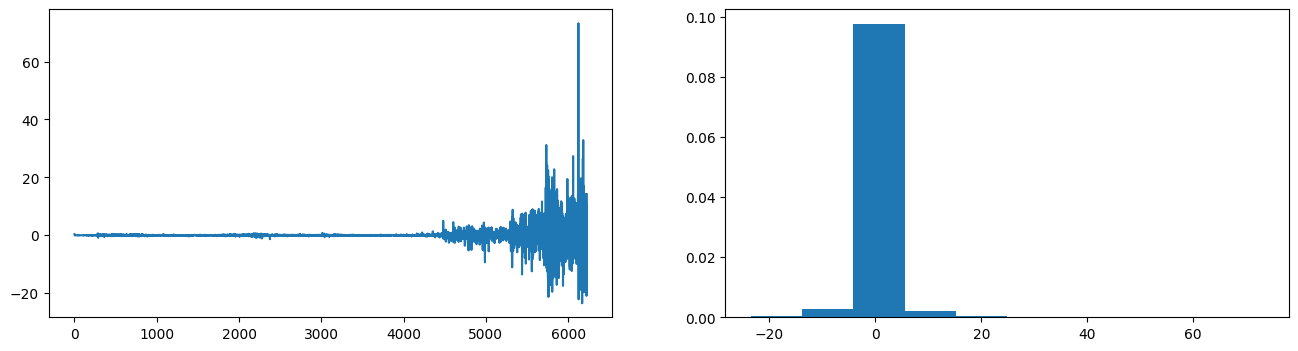

In [291]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

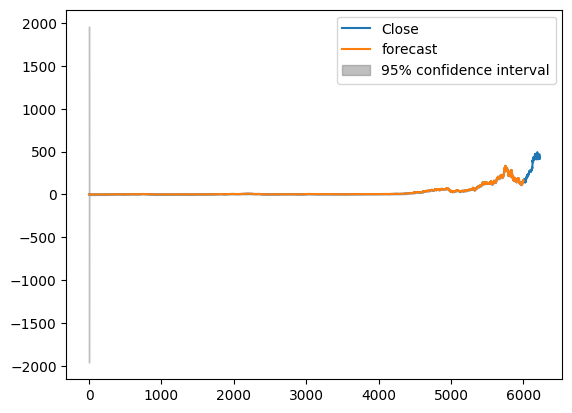

In [292]:
# Actual vs Fitted
from statsmodels.graphics.tsaplots import plot_predict
ax = df.Close.plot()
plot_predict(result, start=0, end=6000, dynamic=False, ax=ax)
plt.show()

The ARIMA model works perfectly fine.

#Train test split


In [293]:
n =int(len(df)*0.8)
train = df.Close[:n]  # 80% of data to train
test = df.Close[n:] # 205 of data to test

print(len(train))
print(len(test))

4983
1246


In [295]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(5, 1, 5))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4983
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -2482.751
Date:                Tue, 24 Oct 2023   AIC                           4987.502
Time:                        15:56:16   BIC                           5059.152
Sample:                             0   HQIC                          5012.619
                               - 4983                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1947      0.253      0.770      0.441      -0.301       0.690
ar.L2          0.1097      0.274      0.401      0.688      -0.427       0.646
ar.L3          0.2180      0.218      0.999      0.3

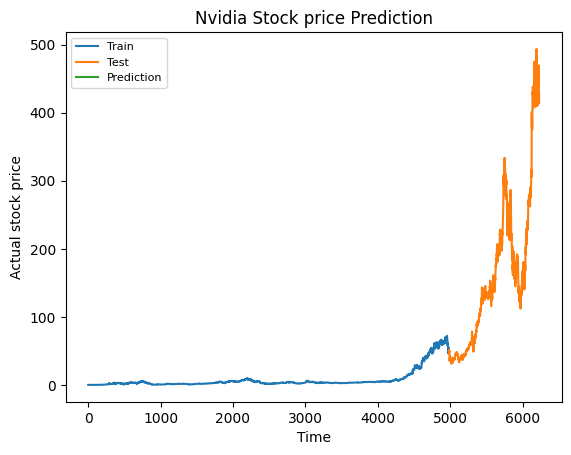

In [296]:
forecast = result.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast, index=test.index, columns=['Prediction'])

# plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('Nvidia Stock price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual stock price')
plt.legend(loc='upper left', fontsize=8)
plt.show()